In [50]:
import os
import pandas as pd

def read_data(file_path):
    # Open the file
    with open(file_path, 'r') as file:  # Use 'with' for automatic file closure

        # Split the text data into lines and remove extra whitespace
        lines = [line.strip() for line in file if line.strip()] 

        # Create a list to store data rows
        data = []

        # Process each line
        for line in lines:
            # Split the values in the line based on multiple spaces
            values = line.split()  
            
            # Convert values to floats
            values = [abs(float(val)) for val in values]

            # Add the row to the data list
            data.append(values)

    # Create a Pandas DataFrame
    column_names = [
        'absolute angle of inclination', 'angle of inclination', 'number of electrodes',
        'voltage magnitude', 'voltage frequency', 'electrode dimension',
        'x pitch', 'number of phases', 'grain mass density',
        'mesh size', 'gravity', 'phase shift', 'time step',
        'maximum classified radius', 'distance between dust generation and first electrode',
        'grain number density', 'yield'
    ]

    df = pd.DataFrame(data, columns=column_names)

    return df

def read_dataset_folder(folder_path):
    # Get a list of all files in the folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] 

    # Create an empty list to store DataFrames
    all_dataframes = []

    # Read each file and append its DataFrame to the list
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        df = read_data(file_path)
        all_dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    concatenated_df = pd.concat(all_dataframes, ignore_index=True)

    concatenated_df = concatenated_df.fillna(concatenated_df.mean())

    return concatenated_df

In [51]:
Folder_name = "Dataset"
data = read_dataset_folder(Folder_name)
data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
0,335.0,25.0,4.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014511,1.0,3.738749
1,335.0,25.0,6.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015185,1.0,2.602313
2,335.0,25.0,8.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015858,1.0,2.719417
3,335.0,25.0,10.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.016532,1.0,1.865867
4,335.0,25.0,4.0,500.0,5.0,4.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014011,1.0,6.512353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8639,25.0,25.0,8.0,2000.0,20.0,3.0,20.0,4.0,4000.0,0.001,3.0,90.0,0.005,0.00001,0.065283,1.0,0.605576
8640,310.0,50.0,4.0,2000.0,20.0,6.0,40.0,4.0,3000.0,0.001,3.0,90.0,0.005,0.00001,0.035495,1.0,19.856253
8641,310.0,50.0,6.0,2000.0,20.0,6.0,40.0,4.0,3000.0,0.001,3.0,90.0,0.005,0.00001,0.032825,1.0,16.188948
8642,50.0,50.0,4.0,2000.0,20.0,6.0,40.0,4.0,3000.0,0.001,3.0,90.0,0.005,0.00001,0.143010,1.0,5.728012


In [52]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8644 entries, 0 to 8643
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   absolute angle of inclination                         8644 non-null   float64
 1   angle of inclination                                  8644 non-null   float64
 2   number of electrodes                                  8644 non-null   float64
 3   voltage magnitude                                     8644 non-null   float64
 4   voltage frequency                                     8644 non-null   float64
 5   electrode dimension                                   8644 non-null   float64
 6   x pitch                                               8644 non-null   float64
 7   number of phases                                      8644 non-null   float64
 8   grain mass density                                    8644

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
count,8644.000000,8644.000000,8644.000000,8644.000000,8644.000000,8644.000000,8644.000000,8644.0,8644.000000,8.644000e+03,8644.000000,8644.0,8.644000e+03,8644.00000,8644.000000,8644.0,8644.000000
mean,169.790028,36.993869,6.890560,1232.531236,12.419597,4.776261,25.208237,4.0,2521.462455,1.000000e-03,4.148907,90.0,5.000000e-03,0.00001,0.075348,1.0,10.729430
std,143.195238,12.490472,2.232481,556.805758,5.537928,0.919739,6.997671,0.0,1142.652238,2.332427e-21,1.473251,0.0,8.674119e-19,0.00000,0.079099,0.0,13.287307
min,25.000000,25.000000,4.000000,500.000000,5.000000,3.000000,20.000000,4.0,1000.000000,1.000000e-03,3.000000,90.0,5.000000e-03,0.00001,0.013011,1.0,0.000000
25%,25.000000,25.000000,4.000000,500.000000,10.000000,4.000000,20.000000,4.0,1000.000000,1.000000e-03,3.000000,90.0,5.000000e-03,0.00001,0.020242,1.0,0.104588
50%,50.000000,25.000000,6.000000,1000.000000,10.000000,5.000000,20.000000,4.0,3000.000000,1.000000e-03,3.000000,90.0,5.000000e-03,0.00001,0.033222,1.0,2.752443
75%,310.000000,50.000000,8.000000,1500.000000,15.000000,6.000000,30.000000,4.0,4000.000000,1.000000e-03,6.000000,90.0,5.000000e-03,0.00001,0.114245,1.0,23.078118
max,335.000000,50.000000,10.000000,2000.000000,20.000000,6.000000,40.000000,4.0,4000.000000,1.000000e-03,9.000000,90.0,5.000000e-03,0.00001,0.429031,1.0,63.634754


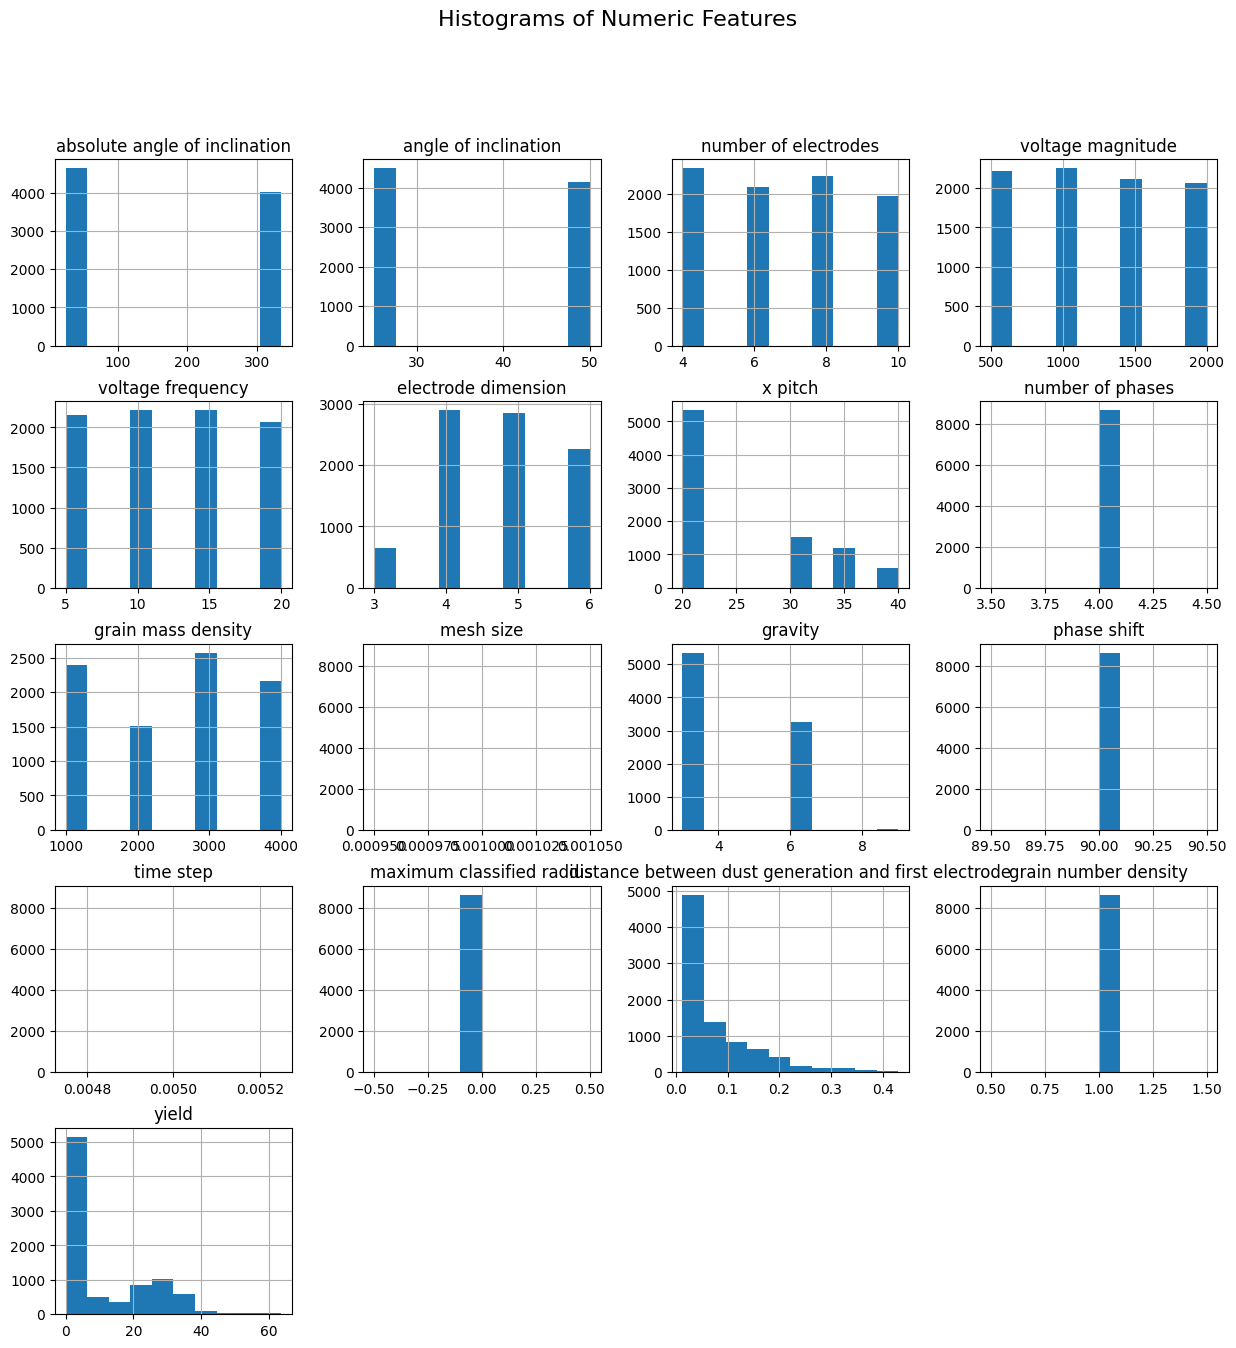

In [53]:
import matplotlib.pyplot as plt

numeric_features = data.select_dtypes(include=['float64'])
numeric_features.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [54]:
numeric_features = ['absolute angle of inclination', 'voltage magnitude', 'voltage frequency',
                    'electrode dimension', 'x pitch', 'grain mass density',
                    'gravity', 'distance between dust generation and first electrode']
# Testing
numeric_features = ['absolute angle of inclination', 'number of electrodes', 'electrode dimension',
                    'x pitch', 'distance between dust generation and first electrode', 'voltage magnitude',
                    'voltage frequency', 'grain mass density', 'gravity']
ordinal_features = []
#ordinal_features = ['number of electrodes', ]
drop_features = ['number of phases', 'mesh size','phase shift', 
                 'time step', 'maximum classified radius', 'grain number density',
                 'angle of inclination'] # Angle removed to avoid multicollinearity
target = "yield"

In [55]:
from sklearn.model_selection import train_test_split
X = data.drop(target, axis=1)  # Features (independent variables)
y = data[target]                # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder

numeric_transformer = StandardScaler()
ordinal_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_encoder, ordinal_features),
    ('drop', drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['absolute angle of inclination',
                                  'number of electrodes', 'electrode dimension',
                                  'x pitch',
                                  'distance between dust generation and first '
                                  'electrode',
                                  'voltage magnitude', 'voltage frequency',
                                  'grain mass density', 'gravity']),
                                ('ordinalencoder', OrdinalEncoder(), []),
                                ('drop', 'drop',
                                 ['number of phases', 'mesh size',
                                  'phase shift', 'time step',
                                  'maximum classified radius',
                                  'grain number density',
                                  'angle of inclination'])])

In [57]:
# Define RMSE calculation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [58]:
# Models to be evaluated
models = {
    'dummy': DummyRegressor(strategy='mean'),
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'polynomial2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'polynomial3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'polynomial4': make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    #'polynomial5': make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
}

param_grid = {
    'ridge': {'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]},
    'lasso': {'lasso__alpha': [0.001, 0.01, 0.1, 1]}
}

In [59]:
import numpy as np

results_dict = {}  # dictionary to store all the results

# Fit models and perform hyperparameter tuning where applicable
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    if name in param_grid:
        # Hyperparameter tuning with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring=make_scorer(rmse, greater_is_better=False), return_train_score=True)
        grid_search.fit(X_train, y_train)
        cv_results = grid_search.cv_results_
        best_index = grid_search.best_index_
        results_dict[name] = {
            'fit_time': np.mean(cv_results['mean_fit_time'][best_index]),
            'score_time': np.mean(cv_results['mean_score_time'][best_index]),
            'train_score': -cv_results['mean_train_score'][best_index],  # Convert to positive
            'test_score': -cv_results['mean_test_score'][best_index],     # Convert to positive
            'best_params': grid_search.best_params_
        }
    else:
        # Regular cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                                    scoring=make_scorer(rmse, greater_is_better=False),
                                    return_train_score=True,
                                    return_estimator=True)
        results_dict[name] = {
            'fit_time': np.mean(cv_results['fit_time']),
            'score_time': np.mean(cv_results['score_time']),
            'train_score': -np.mean(cv_results['train_score']),  # Convert to positive
            'test_score': -np.mean(cv_results['test_score'])     # Convert to positive
        }

In [60]:
# Display the results
pd.DataFrame(results_dict).T

,fit_time,score_time,train_score,test_score,best_params
dummy,0.004852,0.002052,13.329321,13.3298,NaN
linear_regression,0.005504,0.002254,7.192736,7.203886,NaN
ridge,0.005515,0.002295,7.192736,7.203882,{'ridge__alpha': 1.0}
lasso,0.03064,0.009875,7.192825,7.203381,{'lasso__alpha': 0.01}
polynomial2,0.025361,0.005361,5.09289,5.139711,NaN
polynomial3,0.10355,0.013678,3.807935,1001174316.299155,NaN
polynomial4,0.308251,0.014863,2.578864,97225403.323889,NaN


In [49]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['absolute angle of '
                                                   'inclination',
                                                   'voltage magnitude',
                                                   'voltage frequency',
                                                   'electrode dimension',
                                                   'x pitch',
                                                   'grain mass density',
                                                   'gravity',
                                                   'distance between dust '
                                                   'generation and first '
                                                   'electrode']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['number of electrodes']),
                                                 ('drop', 'drop',
                                                  ['number of phases',
                                                   'mesh size', 'phase shift',
                                                   'time step',
                                                   'maximum classified radius',
                                                   'grain number density',
                                                   'angle of inclination'])])),
                ('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=4)),
                                 ('linearregression', LinearRegression())]))])